# Using KNN model to predict the score class of students

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import matplotlib.pyplot as plt

## Import dataset

In [2]:
dataset = pd.read_csv("C:\\Users\\ADMIN\\Desktop\\archive\\test_scores.csv")
dataset

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0
...,...,...,...,...,...,...,...,...,...,...,...
2128,ZOWMK,Urban,Public,ZBH,Standard,30.0,T8LSK,Female,Does not qualify,39.0,55.0
2129,ZOWMK,Urban,Public,ZBH,Standard,30.0,VNP26,Female,Qualifies for reduced/free lunch,38.0,46.0
2130,ZOWMK,Urban,Public,ZBH,Standard,30.0,YDR1Z,Female,Qualifies for reduced/free lunch,45.0,51.0
2131,ZOWMK,Urban,Public,ZBH,Standard,30.0,YUEIH,Male,Qualifies for reduced/free lunch,46.0,53.0


## Dataset Preprocessing

In [3]:
av_test = (dataset['pretest'] + dataset['posttest'])/2 # Finding the average score of students from pretest and posttest

In [4]:
dataset['Average_test'] = av_test # Adding new column(Average_test) to dataset
dataset

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest,Average_test
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0,67.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0,72.5
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0,70.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0,69.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2128,ZOWMK,Urban,Public,ZBH,Standard,30.0,T8LSK,Female,Does not qualify,39.0,55.0,47.0
2129,ZOWMK,Urban,Public,ZBH,Standard,30.0,VNP26,Female,Qualifies for reduced/free lunch,38.0,46.0,42.0
2130,ZOWMK,Urban,Public,ZBH,Standard,30.0,YDR1Z,Female,Qualifies for reduced/free lunch,45.0,51.0,48.0
2131,ZOWMK,Urban,Public,ZBH,Standard,30.0,YUEIH,Male,Qualifies for reduced/free lunch,46.0,53.0,49.5


In [5]:
## Classifying Avearage_test into categories using the for-loop

T_cl = []
for i in dataset['Average_test']:
    if i >= 0 and i < 25:
        T_cl.append('Very Poor')
    elif i >= 25 and i < 40:
        T_cl.append('Poor')
    elif i >= 40 and i < 60:
        T_cl.append('Good')
    elif i >= 60 and i < 80:
        T_cl.append('Very Good')
    else:
        T_cl.append('Excellent')

In [6]:
dataset['Test_Class'] = T_cl # Adding new column(Test_Class) to dataset
dataset

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest,Average_test,Test_Class
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0,67.0,Very Good
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0,72.5,Very Good
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0,70.0,Very Good
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0,69.0,Very Good
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0,70.0,Very Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2128,ZOWMK,Urban,Public,ZBH,Standard,30.0,T8LSK,Female,Does not qualify,39.0,55.0,47.0,Good
2129,ZOWMK,Urban,Public,ZBH,Standard,30.0,VNP26,Female,Qualifies for reduced/free lunch,38.0,46.0,42.0,Good
2130,ZOWMK,Urban,Public,ZBH,Standard,30.0,YDR1Z,Female,Qualifies for reduced/free lunch,45.0,51.0,48.0,Good
2131,ZOWMK,Urban,Public,ZBH,Standard,30.0,YUEIH,Male,Qualifies for reduced/free lunch,46.0,53.0,49.5,Good


In [7]:
# Dropping irrelevant column(student_id)

dataset.drop(columns = (['student_id']), inplace = True)
dataset

,school,school_setting,school_type,classroom,teaching_method,n_student,gender,lunch,pretest,posttest,Average_test,Test_Class
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,Female,Does not qualify,62.0,72.0,67.0,Very Good
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,Female,Does not qualify,66.0,79.0,72.5,Very Good
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,Male,Does not qualify,64.0,76.0,70.0,Very Good
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,Female,Does not qualify,61.0,77.0,69.0,Very Good
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,Male,Does not qualify,64.0,76.0,70.0,Very Good
...,...,...,...,...,...,...,...,...,...,...,...,...
2128,ZOWMK,Urban,Public,ZBH,Standard,30.0,Female,Does not qualify,39.0,55.0,47.0,Good
2129,ZOWMK,Urban,Public,ZBH,Standard,30.0,Female,Qualifies for reduced/free lunch,38.0,46.0,42.0,Good
2130,ZOWMK,Urban,Public,ZBH,Standard,30.0,Female,Qualifies for reduced/free lunch,45.0,51.0,48.0,Good
2131,ZOWMK,Urban,Public,ZBH,Standard,30.0,Male,Qualifies for reduced/free lunch,46.0,53.0,49.5,Good


## Label Encoding the dataset

In [8]:
from sklearn.preprocessing import LabelEncoder

dataset['school'] = LabelEncoder().fit_transform(dataset['school'])
dataset['school_setting'] = LabelEncoder().fit_transform(dataset['school_setting'])
dataset['school_type'] = LabelEncoder().fit_transform(dataset['school_type'])
dataset['classroom'] = LabelEncoder().fit_transform(dataset['classroom'])
dataset['teaching_method'] = LabelEncoder().fit_transform(dataset['teaching_method'])
dataset['n_student'] = LabelEncoder().fit_transform(dataset['n_student'])
dataset['gender'] = LabelEncoder().fit_transform(dataset['gender'])
dataset['lunch'] = LabelEncoder().fit_transform(dataset['lunch'])
dataset['Test_Class'] = LabelEncoder().fit_transform(dataset['Test_Class'])

In [9]:
dataset

,school,school_setting,school_type,classroom,teaching_method,n_student,gender,lunch,pretest,posttest,Average_test,Test_Class
0,0,2,0,22,1,6,0,0,62.0,72.0,67.0,3
1,0,2,0,22,1,6,0,0,66.0,79.0,72.5,3
2,0,2,0,22,1,6,1,0,64.0,76.0,70.0,3
3,0,2,0,22,1,6,0,0,61.0,77.0,69.0,3
4,0,2,0,22,1,6,1,0,64.0,76.0,70.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
2128,22,2,1,94,1,16,0,0,39.0,55.0,47.0,1
2129,22,2,1,94,1,16,0,1,38.0,46.0,42.0,1
2130,22,2,1,94,1,16,0,1,45.0,51.0,48.0,1
2131,22,2,1,94,1,16,1,1,46.0,53.0,49.5,1


## Visualizing dataset using seaborn

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


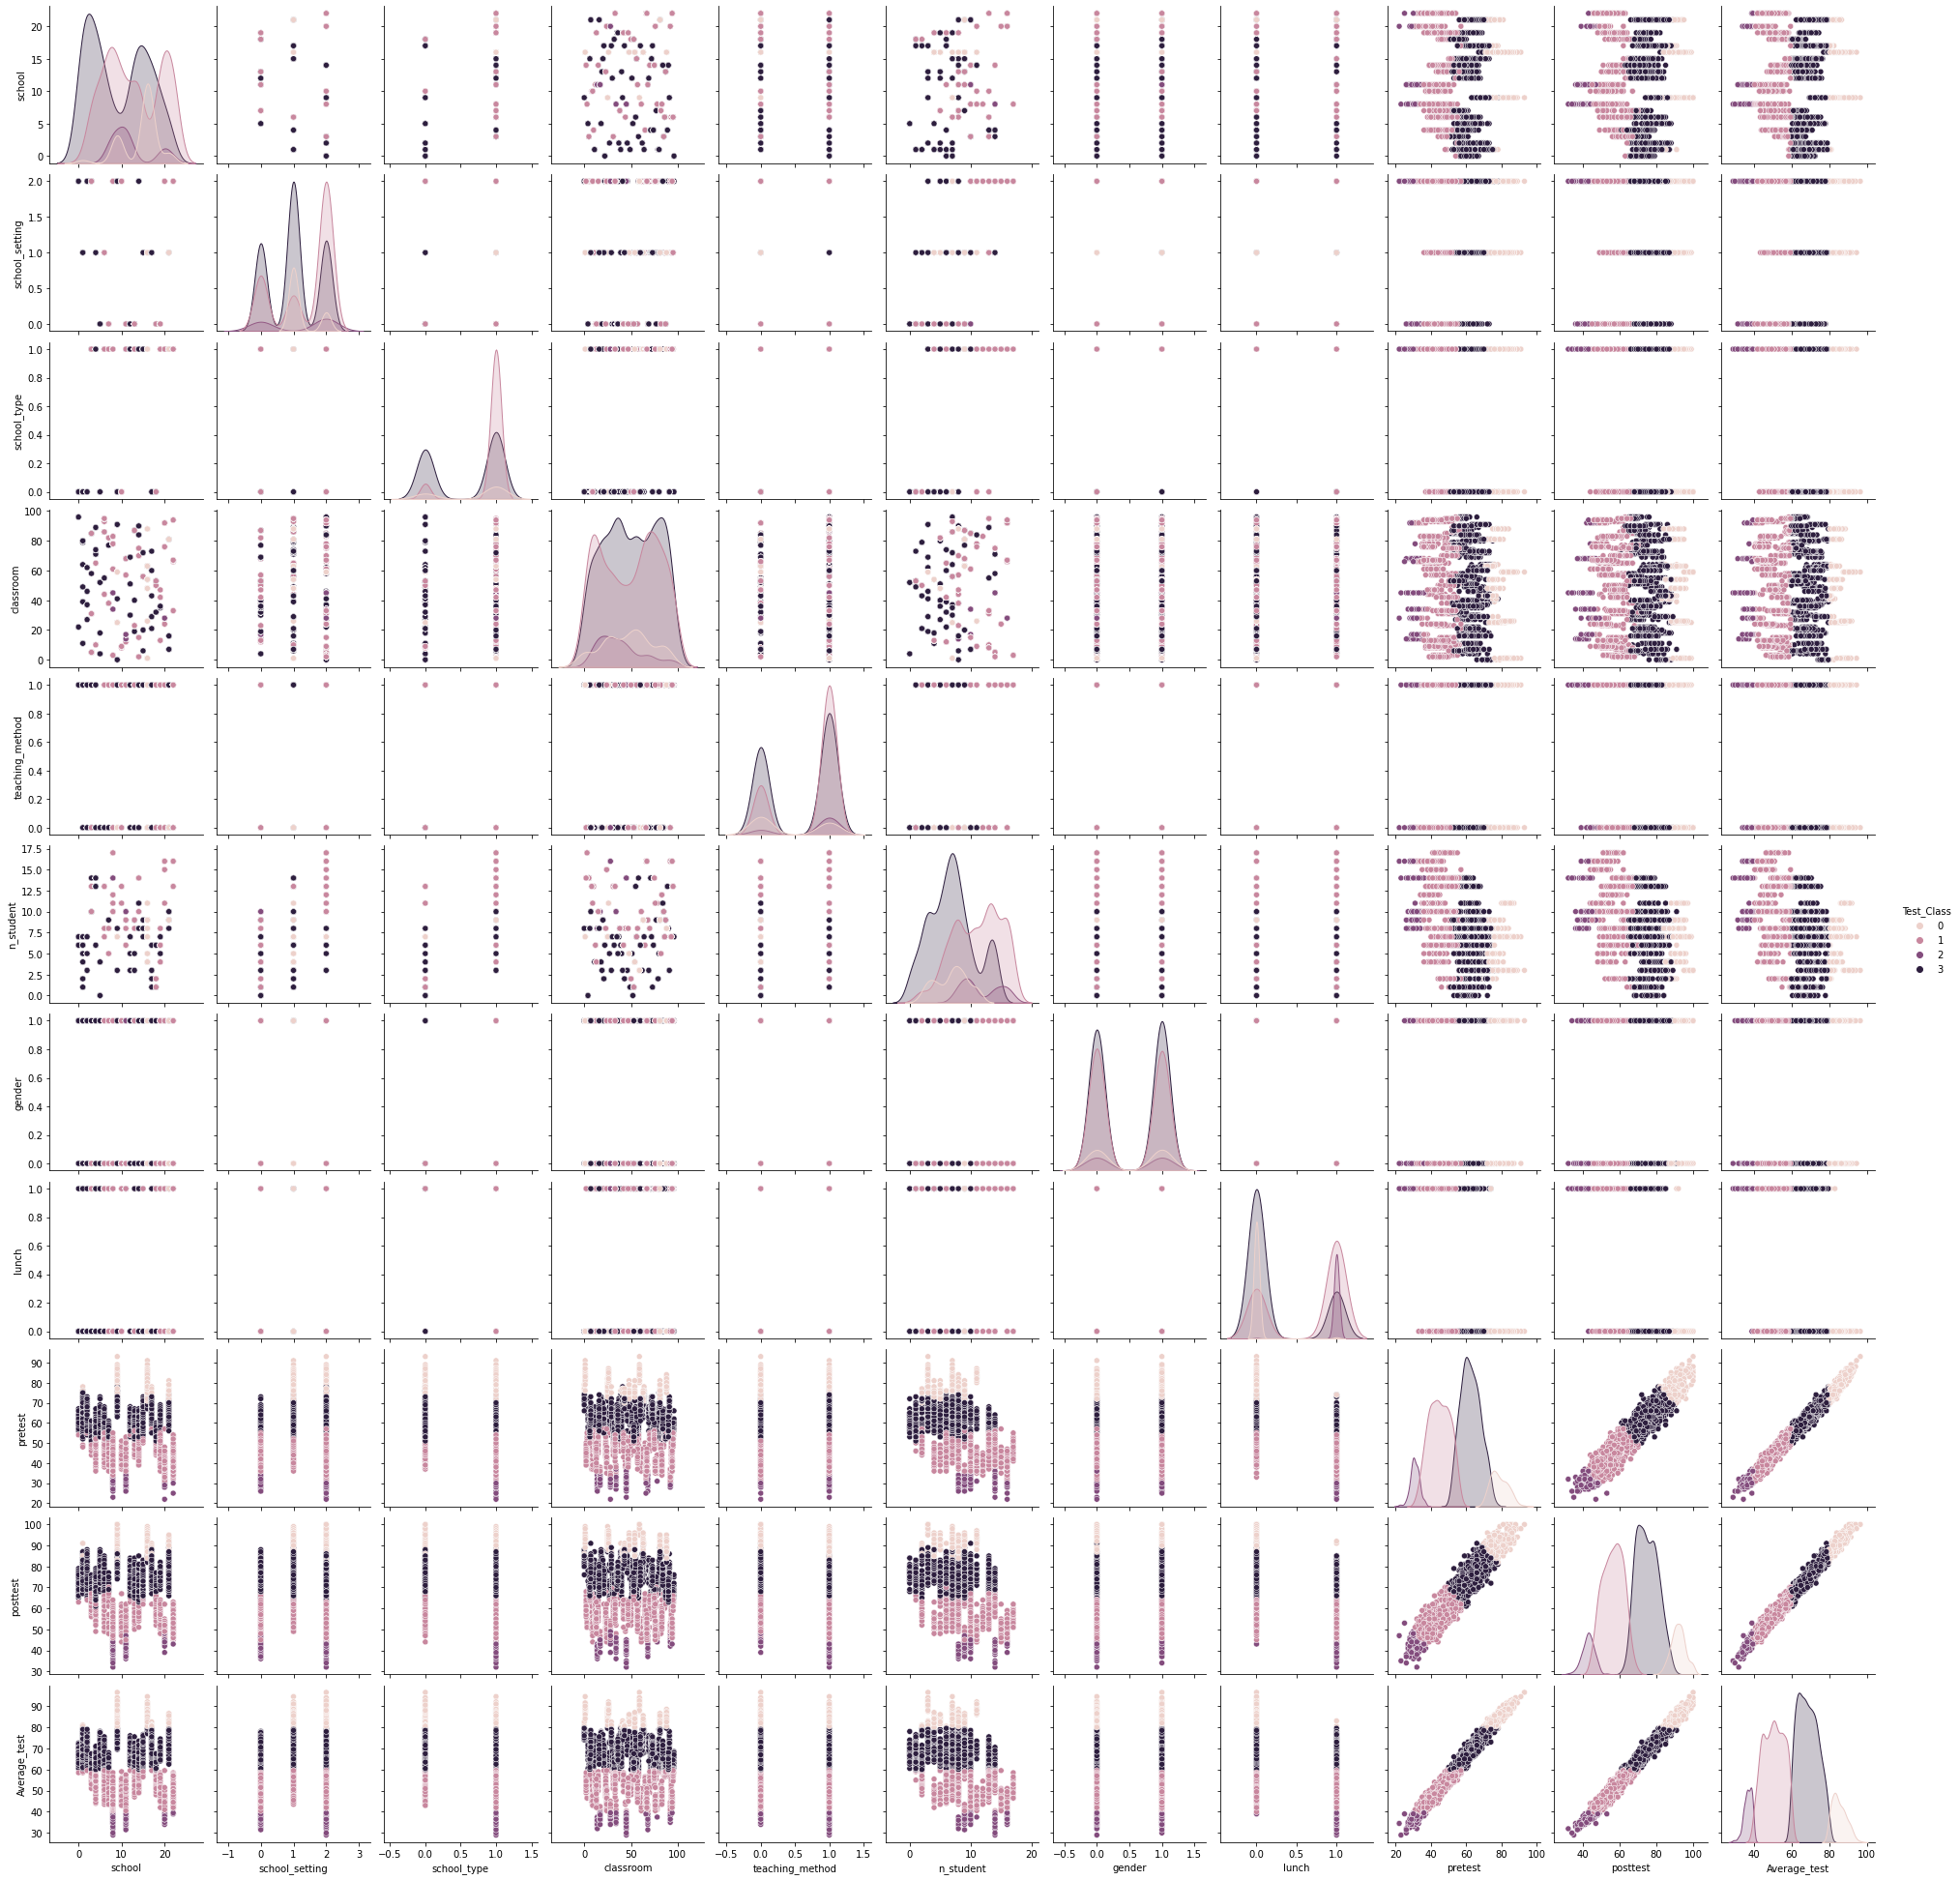

In [10]:
sns.pairplot(dataset, hue = 'Test_Class')

## Splittig dataset into Features and Target

In [11]:
x = dataset.iloc[:, :8].values # Assigning Features(inputs)
y = dataset.iloc[:, -1].values # Assigning Target(output)

## Splitting dataset into train and test

In [12]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = .2, random_state = 0)

## Feature Scaling

In [13]:
sc = StandardScaler()

In [14]:
x_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)

## Training the KNN model with the train dataset

In [15]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p =2)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [16]:
classifier.score(x_test, y_test) # Accuracy score check

0.8782201405152225

### Model performance from Confusion Matrix

In [17]:
from sklearn.metrics import confusion_matrix

In [18]:
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

In [19]:
cm

array([[ 38,   0,   0,   5],
       [  1, 148,  10,  16],
       [  0,   4,  23,   0],
       [  3,  13,   0, 166]], dtype=int64)

Text(42.0, 0.5, 'Truth')

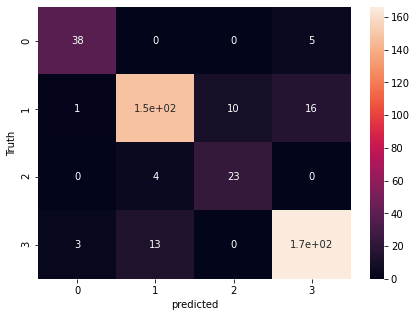

In [20]:
# Using seaborn to visualize the confusion matrix

%matplotlib inline
plt.figure(figsize =(7,5))
sns.heatmap(cm, annot = True)
plt.xlabel('predicted')
plt.ylabel('Truth')

In [21]:
mean_squared_error(y_test, y_pred) # Error check

0.47540983606557374